# CommonLit Readability Prize

In [46]:
%load_ext autoreload
%autoreload 2

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

from wordcloud import WordCloud

In [55]:
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/hkortschak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hkortschak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/hkortschak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/hkortschak/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

### Data Overview

In [5]:
train_df = pd.read_csv("train.csv")

In [6]:
train_df.sample(5)

,id,url_legal,license,excerpt,target,standard_error
2304,06e0d89b4,NaN,NaN,"At the theatre in Shoreditch, on Christmas Eve...",-1.837165,0.476550
396,b54f796ab,https://en.wikipedia.org/wiki/Great_Migration_...,CC BY-SA 3.0,The Great Migration was the movement of 6 mill...,-1.008548,0.472461
564,bae209b89,https://www.africanstorybook.org/,CC BY 4.0,"After a night of heavy rain, a group of friend...",1.432604,0.615058
1303,091dbda14,NaN,NaN,"The landscape had appeared arid at first, for ...",-1.220816,0.486799
1650,fd22f6f1b,NaN,NaN,The villa of which we give a perspective drawi...,-2.373624,0.509798


In [21]:
train_df.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')

In [12]:
train_df.nunique()  # --> continuous target  # missing values visible

id                2834
url_legal          667
license             15
excerpt           2834
target            2834
standard_error    2834
dtype: int64

<AxesSubplot:>

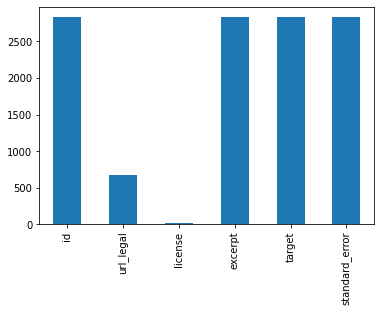

In [23]:
# missing values
train_df.nunique().plot.bar()

### Preprocessing

In [68]:
# preprocessing for analysis
def preprocess_for_analysis(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    text = nltk.word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    text = [word for word in text if word.casefold() not in stop_words]
    lemmatizer = nltk.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

In [71]:
example = train_df.iloc[1]["excerpt"]
print("Before preprocessing: \n", example)
example = preprocess_for_analysis(example)
print("\nAfter preprocessing: \n", example)

Before preprocessing: 
 All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.
At last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go."
"Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really?
Oh, I am so glad! Are you sure you're willing?"
"I've persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can't bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in."
"Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.

After preprocessing: 
 dinner time Mr

In [79]:
# preprocess dataset
train_df["excerpt_preprocessed"] = train_df["excerpt"].apply(lambda row: preprocess_for_analysis(row)

In [80]:
train_df.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_preprocessed
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,young people returned ballroom presented decid...
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,dinner time Mrs Fayre somewhat silent eye rest...
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,Roger predicted snow departed quickly came two...
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,outside palace great garden walled round fille...
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,upon time Three Bears lived together house woo...


### Visualizations and Analysis

In [283]:
# color palette
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
palette = ["#7209C7","#3F99C5","#146F63","#F62585","#FFBA10"]

#palette = sns.diverging_palette(100, 250, n=20)
#sns.palplot(sns.color_palette(palette),size=0.8)
#plt.tick_params(axis='both', labelsize=0, length = 0)

sns.set_style("darkgrid")

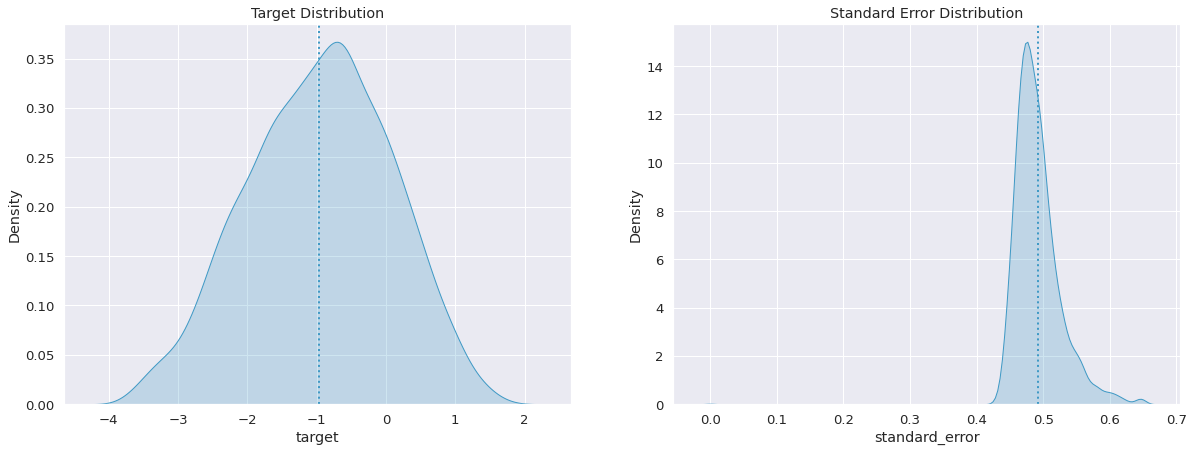

In [284]:
# target distribution
#for dist, title in zip(["target", "standard_error"], ["Target Distribution", "Standard Error Distribution"]):
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.kdeplot(train_df["target"], color=palette[1], shade=True).set_title("Target Distribution")
plt.axvline(train_df["target"].mean(), color=palette[1], linewidth=2, linestyle=":")

plt.subplot(1, 2, 2)
sns.kdeplot(train_df["standard_error"], color=palette[1], shade=True).set_title("Standard Error Distribution")
plt.axvline(train_df["standard_error"].mean(), color=palette[1], linewidth=2, linestyle=":")

plt.show()

In [174]:
# n-grams

In [207]:
ngram_dict, freqs_dict = dict(), dict()
ngrams_names = ["unigrams", "bigrams", "trigrams", ]
n = [1, 2, 3]

In [210]:
for idx in range(len(n)):
    freqs = Counter([])
    
    for text in train_df["excerpt_preprocessed"]:
        
        n_grams = ngrams(text.split(), n[idx])
        freqs += Counter(n_grams)
    
    common_ngrams = freqs.most_common()

    ngrams_list = [" ".join(word) for word, _ in common_ngrams]
    freqs_list = [freq for _, freq in common_ngrams]
    ngram_dict[ngrams_names[idx]] = ngrams_list
    freqs_dict[ngrams_names[idx]] = freqs_list

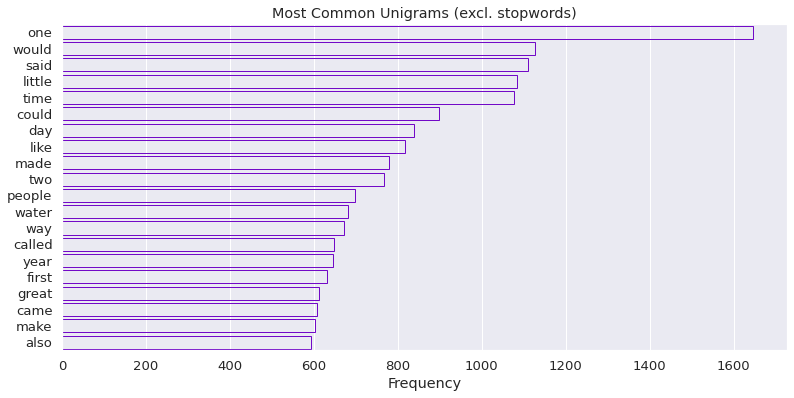

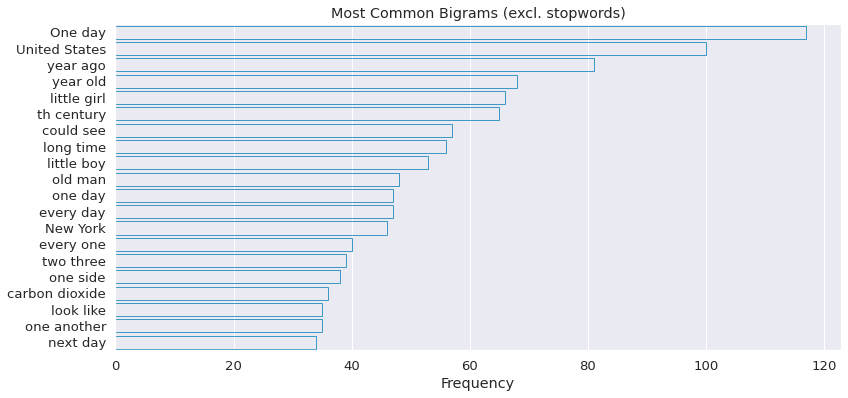

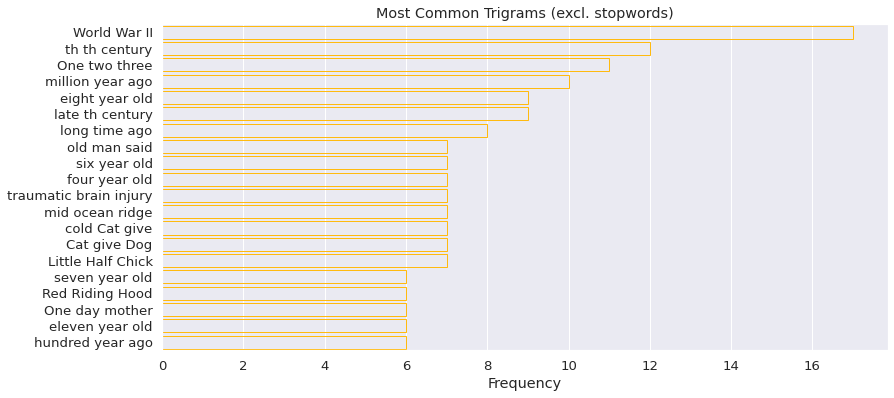

In [285]:
for ngram, color in zip(ngrams_names, [0, 1, 4]):
    plt.figure(figsize=(13, 6))
    sns.barplot(x=freqs_dict[ngram][:20], y=ngram_dict[ngram][:20], facecolor=(0, 0, 0, 0), edgecolor=palette[color], linewidth=1)
    plt.title(f"Most Common {ngram.capitalize()} (excl. stopwords)")
    plt.xlabel("Frequency")
    plt.show()

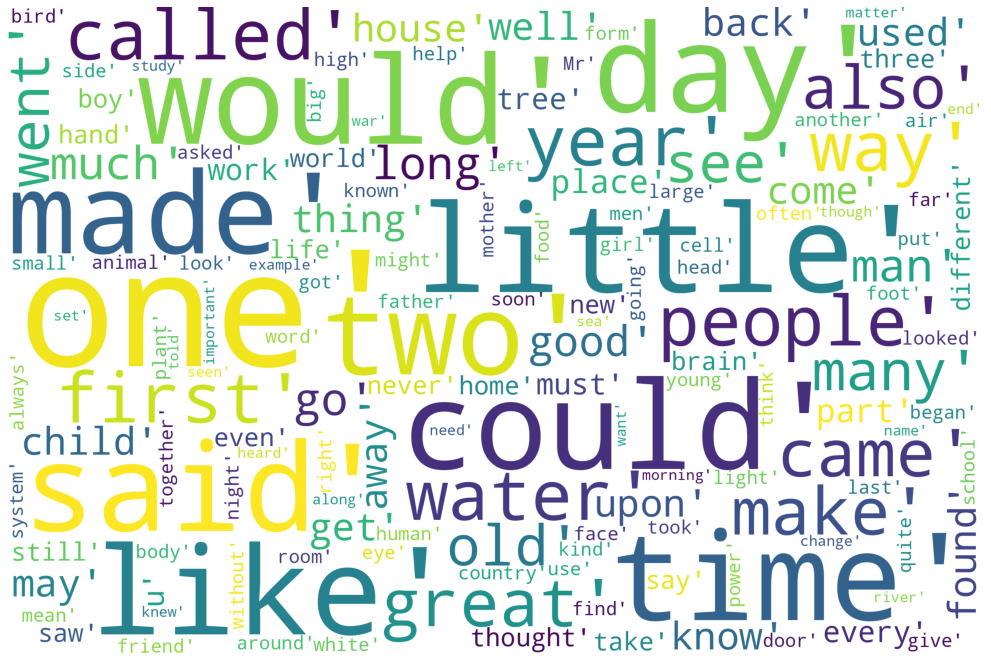

In [279]:
text = [sample.split() for sample in train_df["excerpt_preprocessed"]]
text = [word for sublist in text for word in sublist]
most_common = FreqDist(text).most_common(150)

cloud = WordCloud(
    width=1200,
    height=800,
    background_color="white",
    max_font_size=200,
    max_words=150,
    scale=2
).generate(str(most_common))

fig = plt.figure(figsize=(14,14))
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

In [324]:
# word length

# sentence length
# TODO: each text split into sentences has empyt string at the end --> filter out empty strings!
sentences = train_df["excerpt"].apply(lambda row: row.split("."))
sentences = list(filter(None, sentences))
print(len(sentences))
sentence_length = [len(sentence) for sentence in sentences]
print(sentence_length[:5])
#sentence_length_filtered = list(filter(None, sentence_length))
train_df["sentence_length"] = sentence_length

# text length
#text_length = train_df["excerpt"].apply(lambda row: len(row.split(" ")))
#train_df["text_length"] = text_length

2834
[12, 11, 12, 6, 6]


In [323]:
train_df.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_preprocessed,sentence_length,text_length
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,young people returned ballroom presented decid...,12,174
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,dinner time Mrs Fayre somewhat silent eye rest...,11,164
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,Roger predicted snow departed quickly came two...,12,162
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,outside palace great garden walled round fille...,6,163
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,upon time Three Bears lived together house woo...,6,147


In [321]:
e = train_df["excerpt"][0]
e = [i for i in e.split(".")]
e = list(filter(None, e))
print(e, len(e))

['When the young people returned to the ballroom, it presented a decidedly changed appearance', ' Instead of an interior scene, it was a winter landscape', '\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field', ' The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow', ' Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches', '\nAt each end of the room, on the wall, hung a beautiful bear-skin rug', '\nThese rugs were for prizes, one for the girls and one for the boys', ' And this was the game', '\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole', ' Each player was given a small flag which they were to plant on reaching the Pole', '\nThis would have been an easy matter, but each traveller w